#PHASE 1

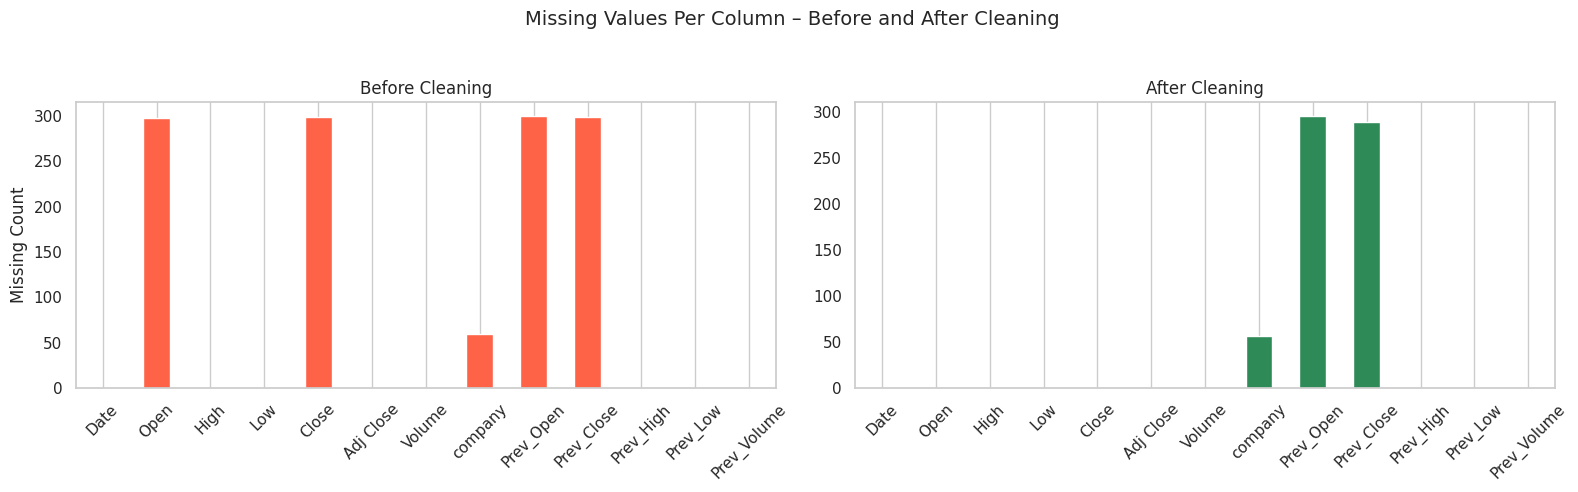

Data cleaned. Shape: (27585, 13)


,Date,Open,High,Low,Close,Adj Close,Volume,company,Prev_Open,Prev_Close,Prev_High,Prev_Low,Prev_Volume
0,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,AAPL,0.513393,0.513393,0.515625,0.513393,117258400.0
1,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,AAPL,0.488839,0.486607,0.488839,0.486607,43971200.0
2,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,AAPL,0.462054,0.462054,0.464286,0.462054,21610400.0
3,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600,AAPL,0.475446,0.475446,0.477679,0.475446,18362400.0
4,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800,AAPL,0.504464,0.504464,0.506696,0.504464,12157600.0


In [78]:
# 1.Data cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("unclean_pds.csv")

# create figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("Missing Values Per Column – Before and After Cleaning", fontsize=14)

# plot before cleaning
df.isnull().sum().plot(kind='bar', ax=axes[0], color='tomato')
axes[0].set_title("Before Cleaning")
axes[0].set_ylabel("Missing Count")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# drop duplicate rows
df = df.drop_duplicates()

# convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# remove rows with negative values in price/volume columns
price_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in price_cols:
    df = df[df[col] >= 0]

# drop invalid dates
df = df.dropna(subset=['Date'])

# sort by company and date
df = df.sort_values(by=['company', 'Date']).reset_index(drop=True)

# plot after cleaning
df.isnull().sum().plot(kind='bar', ax=axes[1], color='seagreen')
axes[1].set_title("After Cleaning")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Data cleaned. Shape:", df.shape)
df.head()

<ipython-input-79-914f49705e7c>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('company', group_keys=False).apply(fill_open_close)


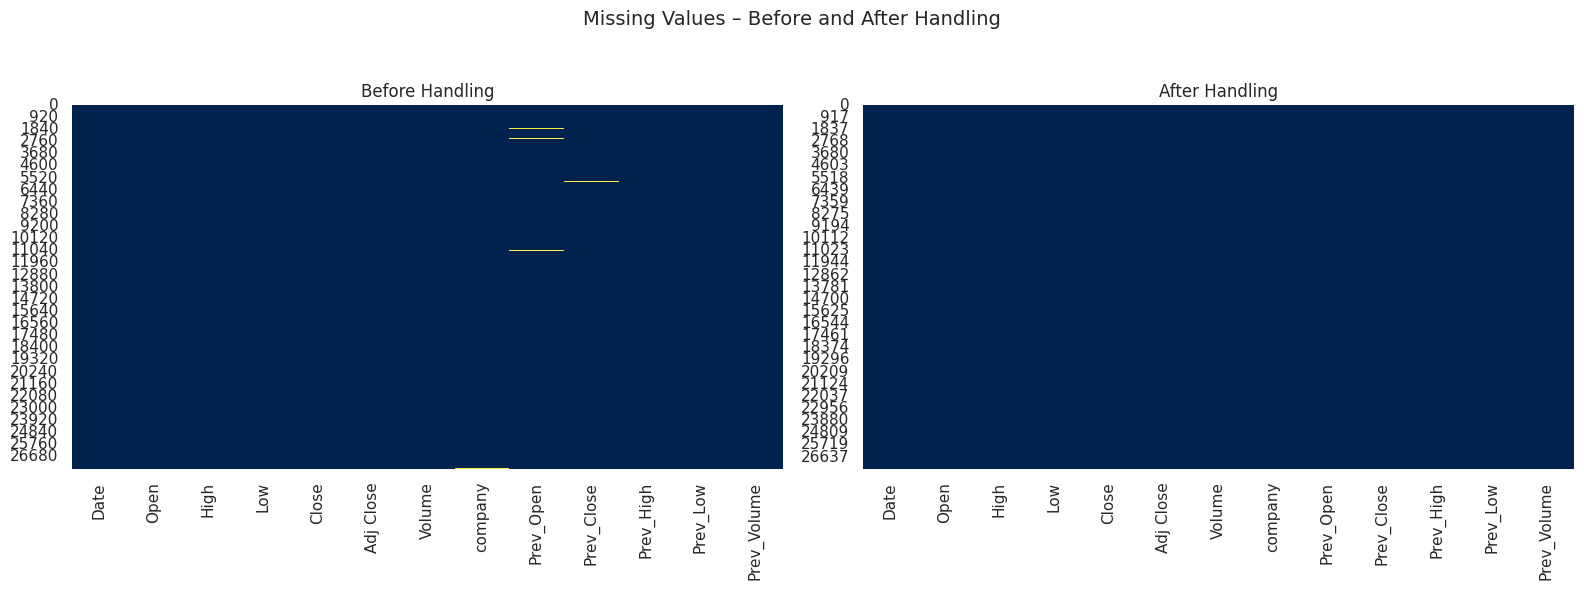

Missing values handled successfully. Shape: (26946, 13)


,Date,Open,High,Low,Close,Adj Close,Volume,company,Prev_Open,Prev_Close,Prev_High,Prev_Low,Prev_Volume
0,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,AAPL,0.513393,0.513393,0.515625,0.513393,117258400.0
1,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,AAPL,0.488839,0.486607,0.488839,0.486607,43971200.0
2,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,AAPL,0.462054,0.462054,0.464286,0.462054,21610400.0
3,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600,AAPL,0.475446,0.475446,0.477679,0.475446,18362400.0
4,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800,AAPL,0.504464,0.504464,0.506696,0.504464,12157600.0


In [79]:
#2.Handling missing values
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create side-by-side heatmaps before and after handling missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Missing Values – Before and After Handling", fontsize=14)

# before handling
sns.heatmap(df.isnull(), cbar=False, cmap="cividis", ax=axes[0])
axes[0].set_title("Before Handling")

# reset index to avoid company being both index and column
df = df.reset_index(drop=True)

# sort by company and date
df = df.sort_values(by=['company', 'Date'])

# fill missing Open using previous day's Close
# and fill missing Close using next day's Open
def fill_open_close(group):
    group = group.sort_values(by='Date')
    group['Open'] = group['Open'].fillna(group['Close'].shift(1))
    group['Close'] = group['Close'].fillna(group['Open'].shift(-1))
    return group

# apply and keep index + company column
df = df.groupby('company', group_keys=False).apply(fill_open_close)



# drop any remaining missing values
df = df.dropna()

# after handling
sns.heatmap(df.isnull(), cbar=False, cmap="cividis", ax=axes[1])
axes[1].set_title("After Handling")

# Adjust layout for a clear visual
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Final output after handling missing values
print("Missing values handled successfully. Shape:", df.shape)
df.head()


In [80]:
#check for any missing valuues
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
company,0
Prev_Open,0
Prev_Close,0


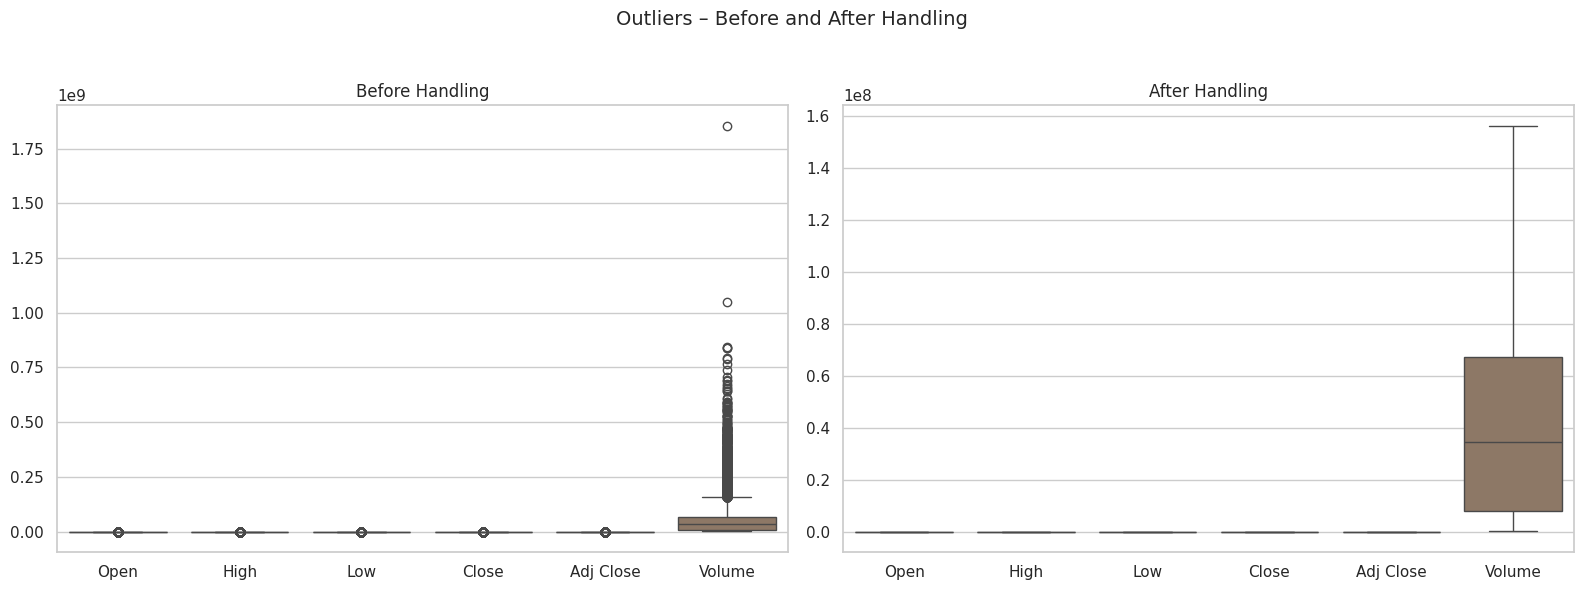

Outliers handled. Shape: (26946, 13)


,Date,Open,High,Low,Close,Adj Close,Volume,company,Prev_Open,Prev_Close,Prev_High,Prev_Low,Prev_Volume
0,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0,AAPL,0.513393,0.513393,0.515625,0.513393,117258400.0
1,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0,AAPL,0.488839,0.486607,0.488839,0.486607,43971200.0
2,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0,AAPL,0.462054,0.462054,0.464286,0.462054,21610400.0
3,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600.0,AAPL,0.475446,0.475446,0.477679,0.475446,18362400.0
4,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800.0,AAPL,0.504464,0.504464,0.506696,0.504464,12157600.0


In [81]:
# 3.Handling outliers with visualization: Using IQR to CAP the outliers

# create a side-by-side plot for before and after handling outliers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Outliers – Before and After Handling", fontsize=14)

# before handling (plot boxplots for numeric columns to detect outliers)
sns.boxplot(data=df[price_cols], ax=axes[0])
axes[0].set_title("Before Handling")

# calculate the IQR for each column
Q1 = df[price_cols].quantile(0.25)
Q3 = df[price_cols].quantile(0.75)
IQR = Q3 - Q1

# define lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# cap the outliers
for col in price_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

# after handling (plot boxplots again to see the effect of capping)
sns.boxplot(data=df[price_cols], ax=axes[1])
axes[1].set_title("After Handling")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Outliers handled. Shape:", df.shape)
df.head()


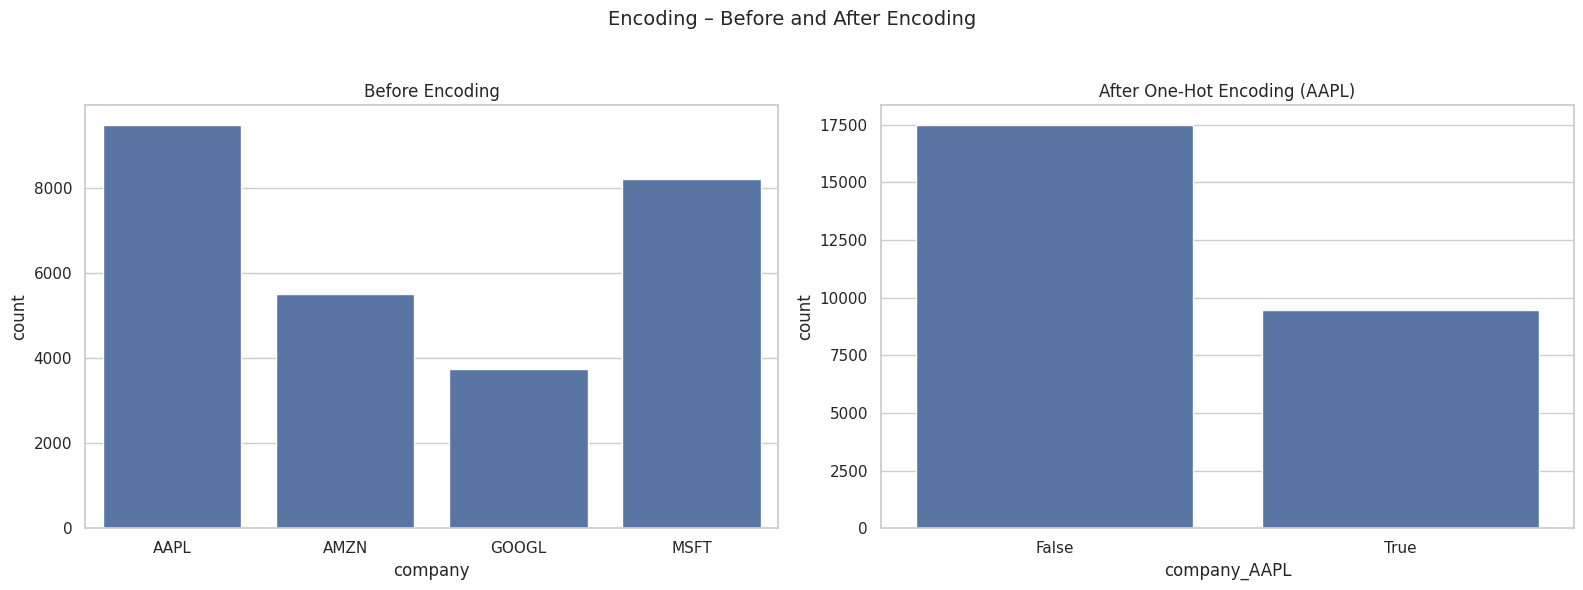

Encoding applied. Shape: (26946, 17)


,Date,Open,High,Low,Close,Adj Close,Volume,company,Prev_Open,Prev_Close,Prev_High,Prev_Low,Prev_Volume,company_AAPL,company_AMZN,company_GOOGL,company_MSFT
0,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0,AAPL,0.513393,0.513393,0.515625,0.513393,117258400.0,True,False,False,False
1,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0,AAPL,0.488839,0.486607,0.488839,0.486607,43971200.0,True,False,False,False
2,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0,AAPL,0.462054,0.462054,0.464286,0.462054,21610400.0,True,False,False,False
3,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600.0,AAPL,0.475446,0.475446,0.477679,0.475446,18362400.0,True,False,False,False
4,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800.0,AAPL,0.504464,0.504464,0.506696,0.504464,12157600.0,True,False,False,False


In [82]:
# 4.Encoding with visualization: using One-Hot Encoding

# create a side-by-side plot for before and after encoding
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Encoding – Before and After Encoding", fontsize=14)

# before encoding (visualize distribution of categorical data)
sns.countplot(data=df, x='company', ax=axes[0])
axes[0].set_title("Before Encoding")

# one-hot encoding for 'company' column (example)
dummies = pd.get_dummies(df['company'], prefix='company', drop_first=False)
df_encoded = pd.concat([df.copy(), dummies], axis=1)  # this retains 'company'

# after encoding (visualize distribution of one-hot encoded data)
# check if 'company_CompanyB' column exists before plotting
if 'company_CompanyB' in df_encoded.columns:
    sns.countplot(data=df_encoded, x='company_CompanyB', ax=axes[1])
    axes[1].set_title("After One-Hot Encoding (CompanyB)")
else:
    # if 'company_CompanyB' doesn't exist, plot a different encoded column or skip
    # get the first encoded company column
    encoded_company_col = df_encoded.columns[df_encoded.columns.str.startswith('company_')][0]
    sns.countplot(data=df_encoded, x=encoded_company_col, ax=axes[1])
    axes[1].set_title(f"After One-Hot Encoding ({encoded_company_col.replace('company_', '')})")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("Encoding applied. Shape:", df_encoded.shape)
df_encoded.head()

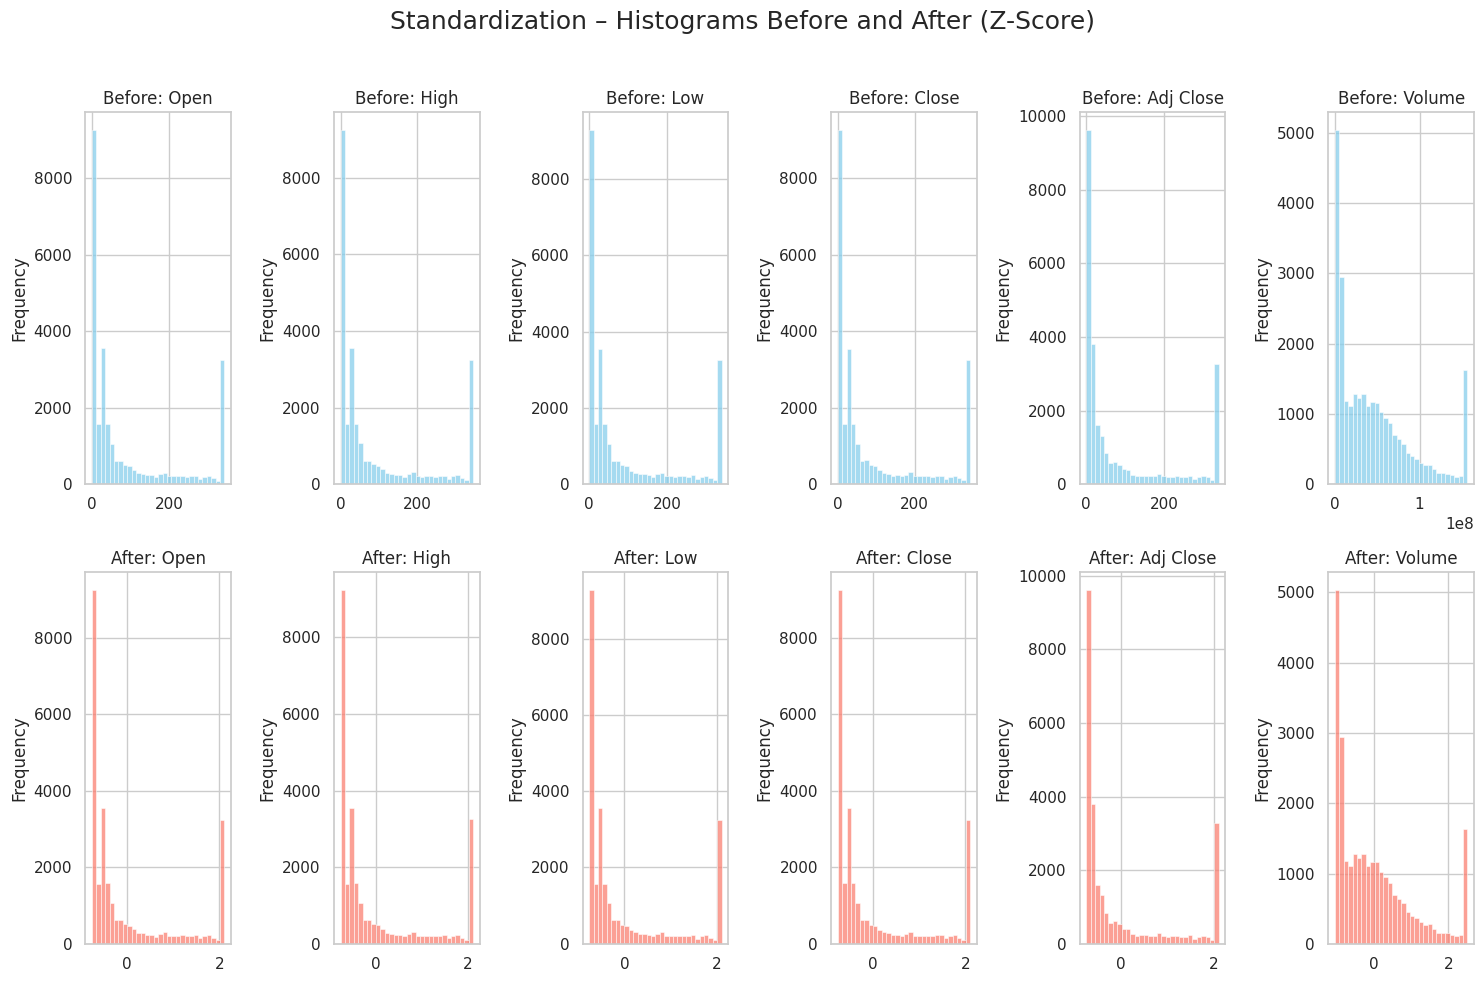

In [83]:
#5.Standardisation and Normalisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

price_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# create figure with 2 rows: Top row = BEFORE, Bottom row = AFTER
fig, axes = plt.subplots(2, len(price_cols), figsize=(15, 10))
fig.suptitle("Standardization – Histograms Before and After (Z-Score)", fontsize=18)

for i, col in enumerate(price_cols):
    # top row: Before standardization
    sns.histplot(df[col], bins=30, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f"Before: {col}")
    axes[0, i].set_xlabel("")
    axes[0, i].set_ylabel("Frequency")

# create copy and scale
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[price_cols] = scaler.fit_transform(df[price_cols])

for i, col in enumerate(price_cols):

    #bottom row: After standardization
    sns.histplot(df_scaled[col], bins=30, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f"After: {col}")
    axes[1, i].set_xlabel("")
    axes[1, i].set_ylabel("Frequency")

# set overall layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [84]:
# save the final dataset to a CSV file
df_encoded.to_csv('clean_pds.csv', index=False)
df = pd.read_csv("clean_pds.csv")
#checking all nan values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
company,0
Prev_Open,0
Prev_Close,0


#PHASE 2

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# load data
df = pd.read_csv("clean_pds.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume,company,Prev_Open,Prev_Close,Prev_High,Prev_Low,Prev_Volume,company_AAPL,company_AMZN,company_GOOGL,company_MSFT
0,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200.0,AAPL,0.513393,0.513393,0.515625,0.513393,117258400.0,True,False,False,False
1,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000.0,AAPL,0.488839,0.486607,0.488839,0.486607,43971200.0,True,False,False,False
2,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400.0,AAPL,0.462054,0.462054,0.464286,0.462054,21610400.0,True,False,False,False
3,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.399707,12157600.0,AAPL,0.475446,0.475446,0.477679,0.475446,18362400.0,True,False,False,False
4,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.419162,9340800.0,AAPL,0.504464,0.504464,0.506696,0.504464,12157600.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26941,2020-03-25,148.910004,154.330002,144.440002,146.919998,146.919998,75638200.0,MSFT,143.750000,148.339996,149.600006,141.270004,82516700.0,False,False,False,True
26942,2020-03-26,148.399994,156.660004,148.369995,156.110001,156.110001,64568100.0,MSFT,148.910004,146.919998,154.330002,144.440002,75638200.0,False,False,False,True
26943,2020-03-30,152.440002,160.600006,150.009995,160.229996,160.229996,63420300.0,MSFT,151.750000,149.699997,154.889999,149.199997,57042300.0,False,False,False,True
26944,2020-03-31,159.399994,164.779999,156.559998,157.710007,157.710007,77927200.0,MSFT,152.440002,160.229996,160.600006,150.009995,63420300.0,False,False,False,True


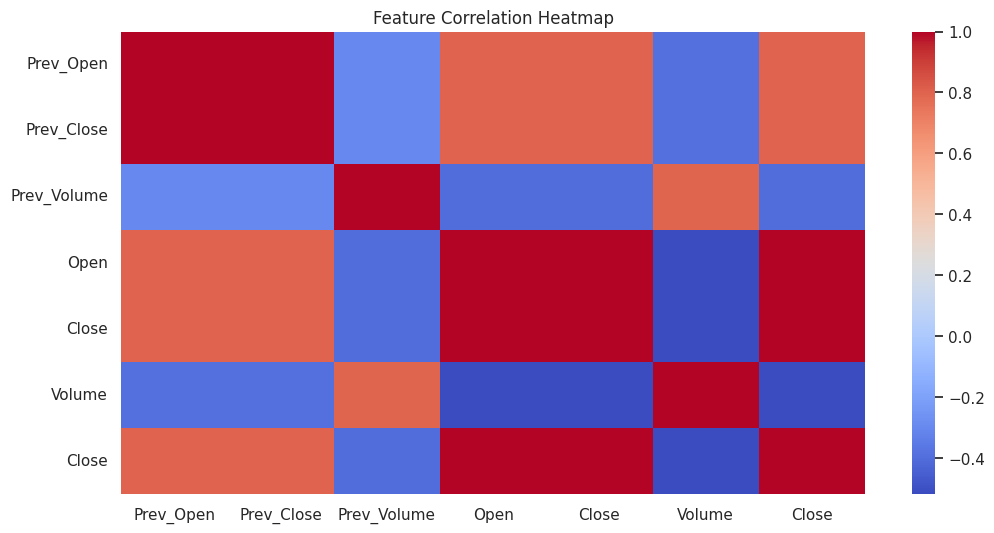

In [86]:
#1.Feature Engineering
df = df.sort_values(by=['company', 'Date'])

# create lagged features (previous day's values)
for col in ['Open', 'Close', 'Volume']:  # Removed 'High' and 'Low'
    df['prev_' + col] = df.groupby('company')[col].shift(1)

# drop rows with any NaN values created by the shifting operation
df = df.dropna()

# define features and target
features = ['Prev_Open','Prev_Close','Prev_Volume','Open', 'Close', 'Volume']
target = 'Close'

# Visualize correlations between features
plt.figure(figsize=(12, 6))
sns.heatmap(df[features + ['Close']].corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
features=['prev_Open','prev_Close','Open']

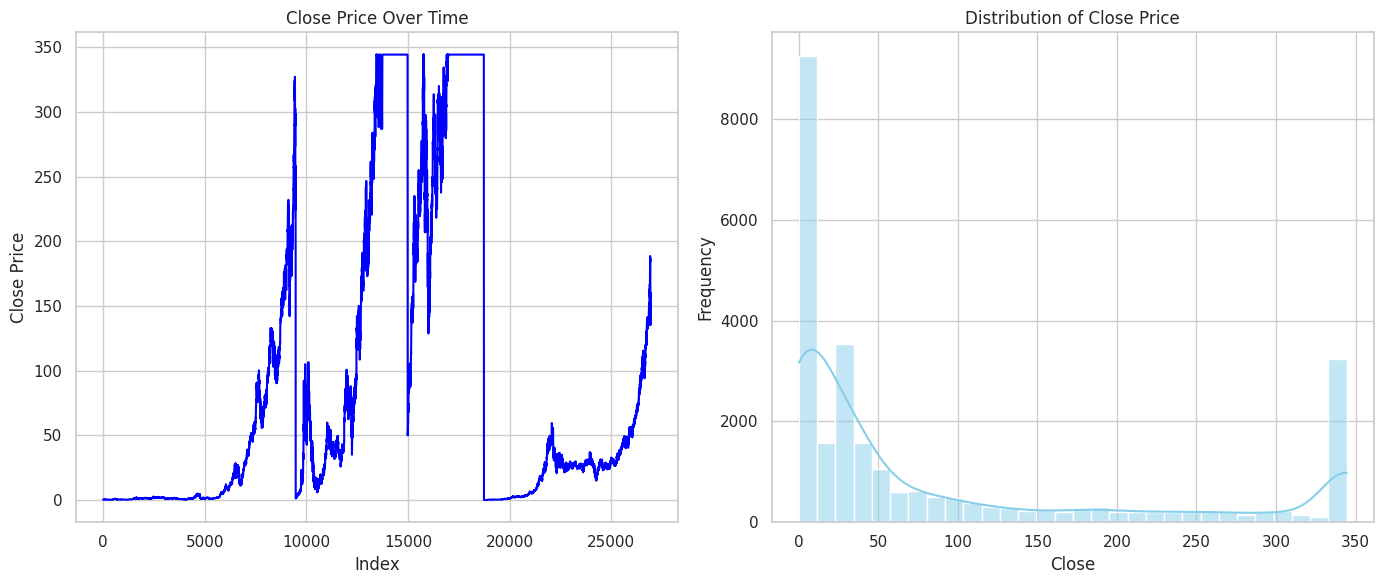

In [87]:
#Variable Analysis
#univariate analysis for Close variable
plt.figure(figsize=(14, 6))

# line Plot
plt.subplot(1, 2, 1)
sns.lineplot(data=df['Close'], color='blue')
plt.title("Close Price Over Time")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.grid(True)

# histogram + KDE
plt.subplot(1, 2, 2)
sns.histplot(df['Close'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Close Price")
plt.xlabel("Close")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

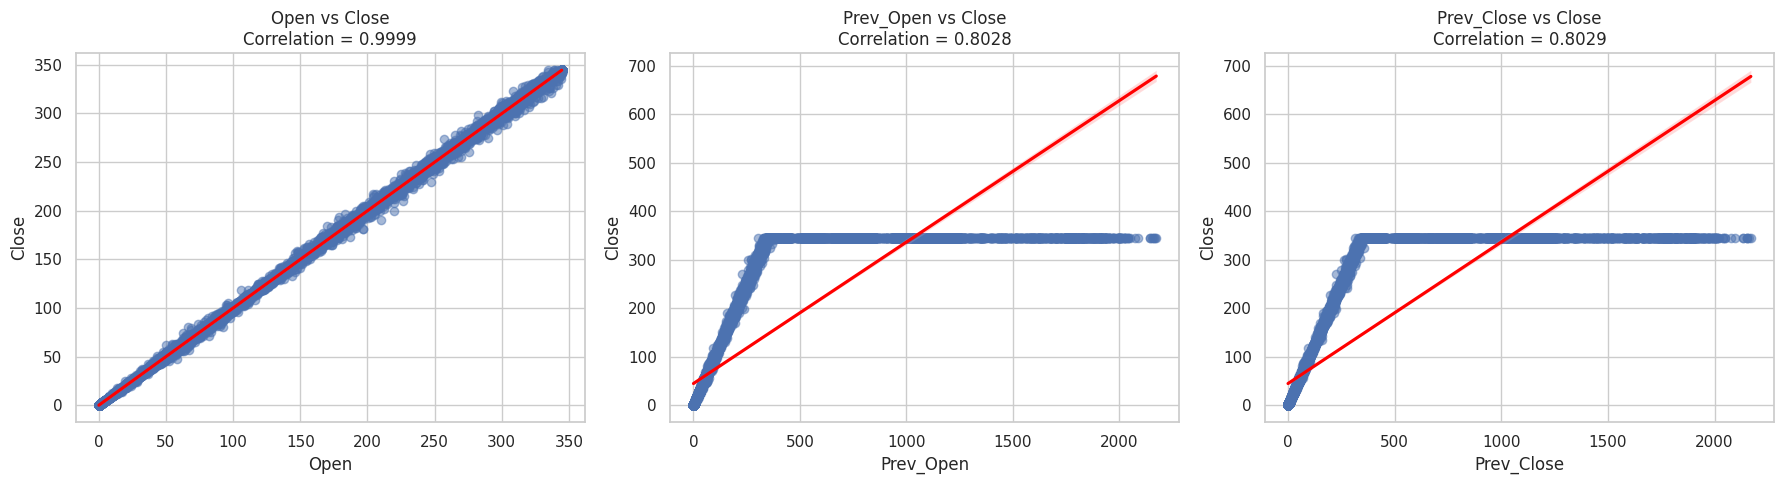

In [88]:
#Bivariate Analysis for Close vs Open, Prev_Close and Prev_Open

sns.set(style='whitegrid', context='notebook')

# list of features to compare against 'Close'
features = ['Open', 'Prev_Open', 'Prev_Close']

# plotting
plt.figure(figsize=(18, 5))

for idx, feature in enumerate(features):
    plt.subplot(1, 3, idx + 1)
    sns.regplot(data=df, x=feature, y='Close', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    corr_value = df[feature].corr(df['Close'])
    plt.title(f'{feature} vs Close\nCorrelation = {corr_value:.4f}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Close')

plt.tight_layout()
plt.show()

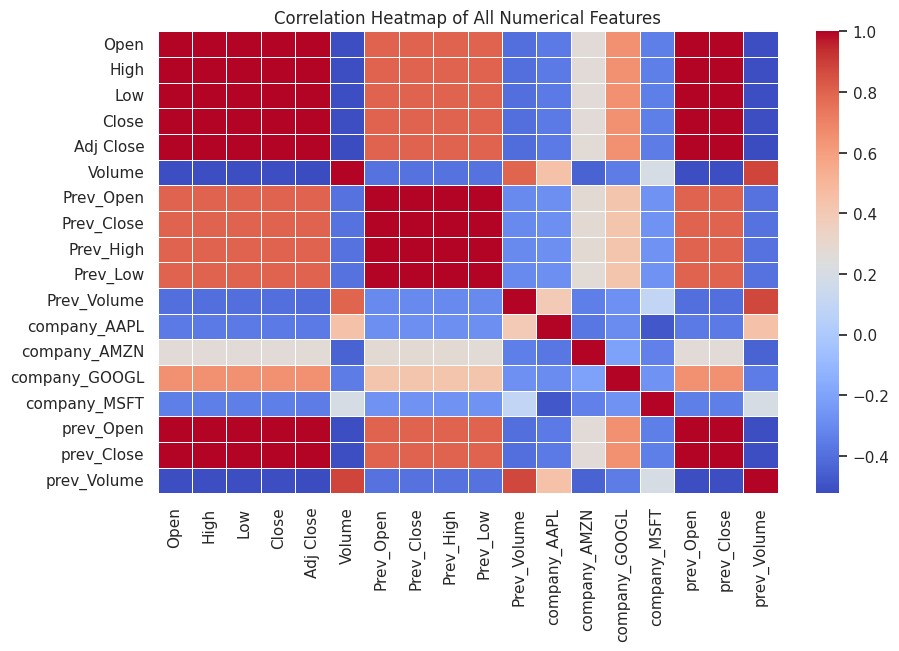

<Figure size 640x480 with 0 Axes>

In [89]:
#Multivariate Analysis

# correlation heatmap (full dataset)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Numerical Features")
plt.show()

plt.tight_layout()
plt.show()


In [90]:
#2.Model Application
X = df[features]
y = df[target]

models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# split data chronologically (no leakage)
split_idx = int(len(X) * 0.349)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

Model Performance Summary:

Decision Tree
MSE (Test): 808.3050
R2 Score (Test): 0.9537
MAE (Test): 13.9084
MSE (CV): 1057.5009

Random Forest
MSE (Test): 811.6537
R2 Score (Test): 0.9536
MAE (Test): 13.8019
MSE (CV): 1055.4953

XGBoost
MSE (Test): 1331.7466
R2 Score (Test): 0.9238
MAE (Test): 18.0897
MSE (CV): 1075.1837


<ipython-input-91-b7efd599740e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='Set2')
<ipython-input-91-b7efd599740e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='Set2')
<ipython-input-91-b7efd599740e>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='Set2')


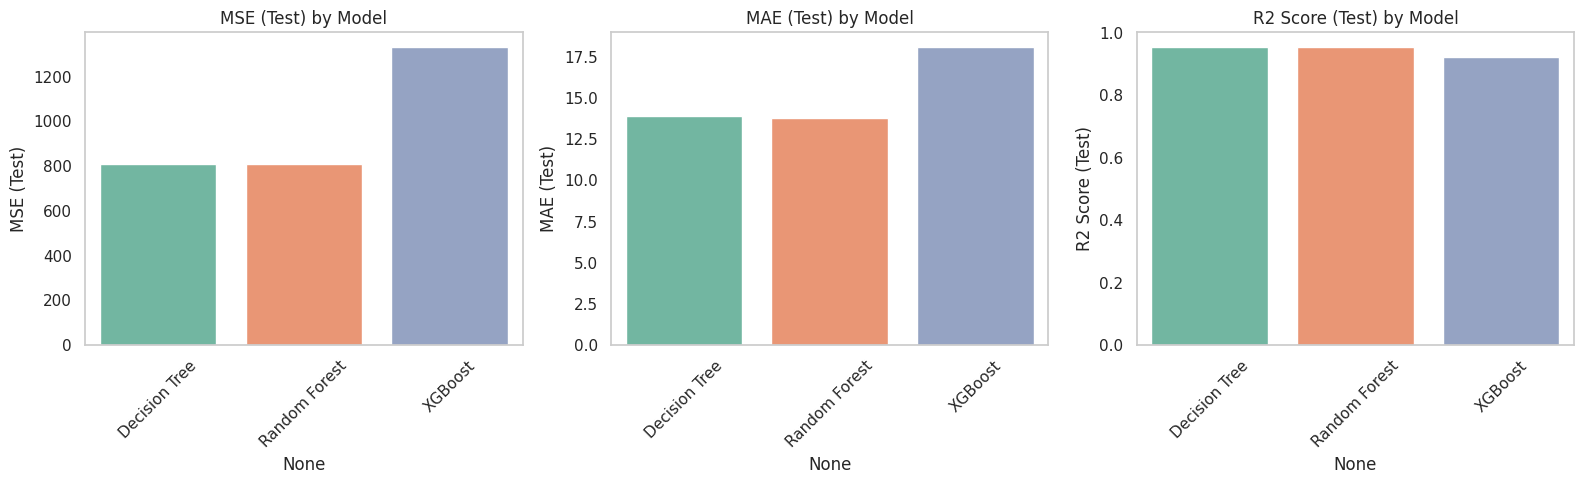

<ipython-input-91-b7efd599740e>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['MSE (CV)'], palette='coolwarm')


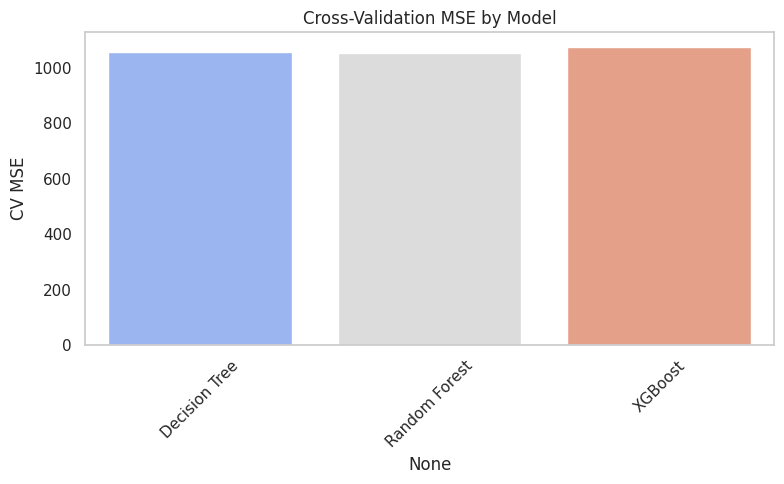

In [91]:
#3.Model validation using MSE, MAE and R2 and cross validation
# dictionary to store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # cross-validation using TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()

    results[name] = {
        'MSE (Test)': mse,
        'R2 Score (Test)': r2,
        'MAE (Test)': mae,
        'MSE (CV)': cv_mse,
    }

# display results
print("Model Performance Summary:")
for name, metrics in results.items():
    print(f"\n{name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


# convert results to DataFrame
results_df = pd.DataFrame(results).T

# bar plot: MSE, MAE, R2 on test set
plt.figure(figsize=(16, 5))
for i, metric in enumerate(['MSE (Test)', 'MAE (Test)', 'R2 Score (Test)']):
    plt.subplot(1, 3, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric], palette='Set2')
    plt.title(f'{metric} by Model')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

# bar plot: Cross-validation MSE
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df['MSE (CV)'], palette='coolwarm')
plt.title('Cross-Validation MSE by Model')
plt.xticks(rotation=45)
plt.ylabel('CV MSE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [92]:
# Hyperparameter tuning to control overfitting and underfitting
models['Decision Tree'] = DecisionTreeRegressor(max_depth=2, random_state=42)

models['Random Forest'] = RandomForestRegressor(n_estimators=5, max_depth=2, random_state=42)

models['XGBoost'] = XGBRegressor(n_estimator=50, max_depth=4, learning_rate=0.02, random_state=42)

Overfitting & Underfitting Check:



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:58:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


,Train R2,Test R2
Decision Tree,0.9679,0.9712
Random Forest,0.9696,0.9734
XGBoost,0.9819,0.9780


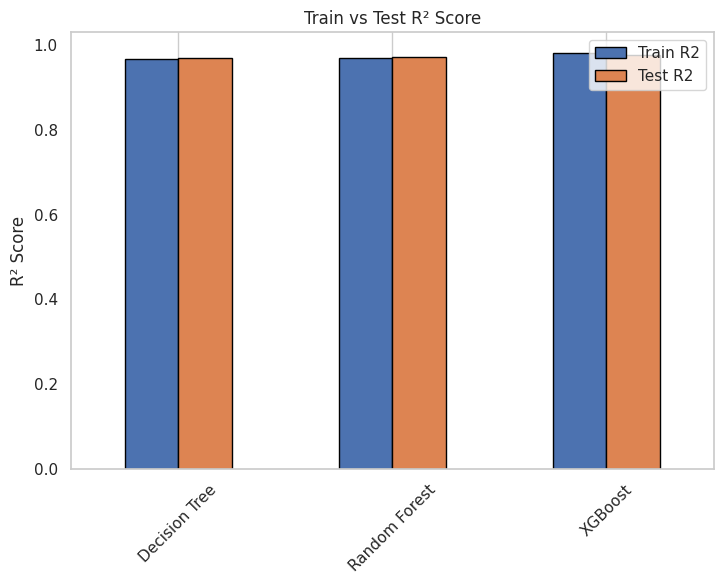

In [93]:
#4. Overfitting vs Underfitting

overfit_results = {}

split_idx = int(len(X) * 0.45)
split2=int(len(X)*0.55)
X_train, X_test = X.iloc[:split2], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split2], y.iloc[split_idx:]

for name, model in models.items():
    # fit model on training data
    model.fit(X_train, y_train)

    # predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    overfit_results[name] = {
        'Train R2': train_r2,
        'Test R2': test_r2
    }

# convert to DataFrame
overfit_df = pd.DataFrame(overfit_results).T

# display
print("Overfitting & Underfitting Check:\n")
display(overfit_df.style.background_gradient(cmap='RdYlGn_r').format("{:.4f}"))

#plot for visual comparison
plt.figure(figsize=(14, 6))

#R^2 Plot
plt.subplot(1, 2, 2)
overfit_df[['Train R2', 'Test R2']].plot(kind='bar', ax=plt.gca(), edgecolor='black')
plt.title("Train vs Test R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [94]:
#5. Check Accuracy of the Machine Learning Model

# convert the evaluation results to a DataFrame for visualization
results_df = pd.DataFrame(results).T  # Transpose for readability

# display the summary table with gradient formatting

display(results_df.style
    .background_gradient(cmap='YlOrRd', subset=['MSE (Test)', 'MAE (Test)', 'MSE (CV)'])
    .background_gradient(cmap='YlOrRd', subset=['R2 Score (Test)'])
    .format("{:.4f}")
    .set_caption("🔍 Final Model Performance Summary with Grading"))


# plt.tight_layout()
# plt.show()

,MSE (Test),R2 Score (Test),MAE (Test),MSE (CV)
Decision Tree,808.3050,0.9537,13.9084,1057.5009
Random Forest,811.6537,0.9536,13.8019,1055.4953
XGBoost,1331.7466,0.9238,18.0897,1075.1837
